# I. Lý thuyết

1) Tại sao các mô hình deep learning lại chiếm ưu thế hơn so với các mô hình machine learning truyền thống đối với dữ liệu lớn ?

A. Do mô hình deep learning có thể được thiết kế với kích thước tùy ý nên có khả năng xấp xỉ mọi hàm số. Do đó nó có khả năng biểu diễn tốt và hoạt động hiệu quả trên dữ liệu lớn.

B. Các mô hình machine learning thường bị overfitting đối với dữ liệu lớn ?

C. Các mô hình deep learning có chi phí huấn luyện tốn kém hơn so với machine learning.

D. Do kiến trúc của mô hình Machine Learning bao gồm nhiều layers xếp chồng.


2) Ý nghĩa của hàm loss function trong mạng neural network là gì ?

A. Là hàm số đánh giá độ chính xác của mô hình.

B. Mục tiêu của quá trình huấn luyện là tối thiểu hóa hàm loss function bằng thuật toán gradient descent. Giá trị của hàm số này giúp đo lường mức độ khớp của dự báo từ mô hình trên dữ liệu huấn luyện.

C. Khi loss function giảm thì luôn đảm bảo độ chính xác của mô hình tăng.

D. Là hàm số cần tối đa hóa trong quá trình huấn luyện.


3) Khi huấn luyện trên các bộ dữ liệu bigdata thì chúng ta nên sử dụng phương pháp nào ?

A) Sử dụng gradient descent trên toàn bộ dữ liệu.

B) Sử dụng stochastic gradient descent trên từng điểm dữ liệu.

C) Mini-batch gradient descent huấn luyện mô hình trên từng tập dữ liệu con có kích thước nhỏ hơn memory CPU/GPU.

D) Có thể sử dụng stochastic gradient descent hoặc mini-batch gradient descent.


4) Quá trình feed forward và backpropagation thực hiện những gì ?

A) feed forward tính toán output và loss function, backpropagation tính đạo hàm trên từng layer và cập nhật trọng số.

B) feed forward cập nhật trọng số cho mô hình, backpropagation tính toán output và loss function.

C) feed forward tính ra output của mô hình, backpropagation tính toán loss function

D) feed forward được thực hiện sau backpropagation.

5) Tác dụng của batch normalization là gì ?

A) Loại bỏ một tỷ lệ ngẫu nhiên số lượng units tại mỗi layer để tạo thành nhiều kiến trúc kết hợp ngẫu nhiên.

B) Tìm ra các tham số phân phối là trung bình và phương sai trên từng mini-batch.

C) Đồng nhất phân phối xác suất của $z^{[l]}$ trên mỗi layer $l$.

D) Giảm thiểu ảnh hưởng của input distribution shift nhằm giúp huấn luyện loss function nhanh và ổn định hơn.

# II. Thực hành

Xuất phát từ mô hình tốt nhất của bạn xây dựng được đối với bài toán phân loại income classification tại bài trước. Bạn hãy thực hiện một số thử nghiệm sau:

6) Thay đổi hàm loss function, batch size và optimizer.

7) Thử nghiệm thêm các layers mà bạn đã học được trong bài này vào kiến trúc của mình.

8) Thay đổi các khởi tạo trọng số theo các phân phối khác nhau và đánh giá độ chính xác của kết quả huấn luyện.

9) Thiết lập không gian search và tự động hóa tìm kiếm kiến trúc tốt nhất trên optuna.

10) Deploy model sử dụng flask ap. Tham khảo [Flaskapp tutorial](https://drive.google.com/file/d/1AZNtzrmnhJ-OBgijWoaAqXbPhJ6xL0Po/view?usp=sharing).

# Part1 
1) A
2) B
3) C
4) A
5) C


In [ ]:
from google.colab import drive
import os

drive.mount("/content/gdrive")
os.chdir("gdrive/MyDrive/Colab Notebooks/KhanhML")
print(os.getcwd())

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/KhanhML


In [ ]:
import tensorflow as tf
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import utils
from tensorflow.keras import optimizers

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
train  = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KhanhML/train_income.csv")
test  = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KhanhML/test_income.csv")

In [ ]:
def one_hot_categorical_features(df, cat_features):
    df_new=pd.get_dummies(df, columns=cat_features)
    return df_new

def preprocess_data(data, continuous_feat, categorical_feat, income_feat):
    scaler=StandardScaler()
    data = data[continuous_feat+categorical_feat+income_feat]
    for col in data.columns:
        data[col].replace("?", np.nan, inplace=True)
        
        if col in continuous_feat:
            data[col] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))      
    return data

In [ ]:
## Process
categorical_feat = ['work_type','education','marital_state','job','status','ethnicity','sex','nationality']
continuous_feat = ['age','final_weight','total_education_yrs','capital_gain','capital_loss','hrs_per_week']

train_process = preprocess_data(train.iloc[:,1:],continuous_feat,categorical_feat,['target_income'])
test_process = preprocess_data(test.iloc[:,1:],continuous_feat,categorical_feat,[])

train_process = one_hot_categorical_features(train_process,categorical_feat)
test_process = one_hot_categorical_features(test_process,categorical_feat)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
label = 'target_income'
features = [i for i in train_process.columns if 'target_income' not in i and i in test_process.columns]
x_train, x_test, y_train, y_test = train_test_split(train_process[features].values, # input variable
                                                    train_process[label].values, # output variable
                                                    test_size=0.20, # test dataset proportion
                                                    stratify=train_process['target_income'], # assign equal proportion of target label in train/test 
                                                    random_state=0) # keep train/test split the same if run again. 

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
hl = 20 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='sigmoid', kernel_initializer=tf.initializers.HeNormal()))
model.add(BatchNormalization())
model.add(Dense(hl, input_dim=hl, activation='relu', kernel_initializer=tf.initializers.HeNormal()))
model.add(BatchNormalization())
model.add(Dense(hl, input_dim=hl, activation='tanh', kernel_initializer=tf.initializers.RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Dense(hl, input_dim=hl, activation='relu', kernel_initializer=tf.initializers.RandomNormal()))
model.add(BatchNormalization())
model.add(Dense(1, input_dim=hl, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2100      
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 batch_normalization_2 (Batc  (None, 20)               8

In [ ]:
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='BinaryCrossentropy',
              optimizer=opt,
              metrics=['Accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 10
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=16)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


NameError: ignored

In [ ]:
model.save('/gdrive/MyDrive/Colab Notebooks/KhanhML/income_dl')

INFO:tensorflow:Assets written to: /gdrive/MyDrive/Colab Notebooks/KhanhML/income_dl/assets


In [ ]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt

# Get predictions for the test data
predicted = model.predict(x_test)
predicted = np.where(predicted > 0.5, 1, 0)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted)
# plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
# plt.colorbar()
# # tick_marks = np.arange(len(label))
# # plt.xticks(tick_marks, label, rotation=45)
# # plt.yticks(tick_marks, label)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# # plt.show()

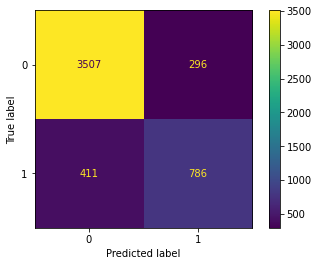

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
accuracy_score(y_test, predicted)

0.8586

# OPTUNA

In [ ]:
!pip install optuna
import optuna 
import joblib
import time

     |████████████████████████████████| 308 kB 7.5 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 210 kB 68.0 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 149 kB 52.6 MB/s 
     |████████████████████████████████| 113 kB 62.8 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=215df73501ebf0d33faff1e46db35a5f5eff03be5c77ee76ffdd5651159fd751
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks/KhanhML'

In [ ]:
def model_dl_optuna(X_train, y_train, X_test, y_test,n_trials=50):
  # study_name = "/gdrive/MyDrive/Colab Notebooks/KhanhML/params_{}.pkl".format(time.strftime("%Y%m%d-%H%M%S"))
  study=optuna.create_study(direction='maximize')
  study.optimize(lambda trial:obj_dl_model(trial, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test),
                                          n_trials=n_trials)
  
  # Save model
  # joblib.dump(value=study, filename=study_name)

  # Get best params
  best_params = study.best_trial
  for key, value in best_params.params.items():
    print("{}: {}".format(key, value))

  return best_params

In [ ]:
def obj_dl_model(trial, X_train, y_train, X_test, y_test):
    # Param Setiings
    hl = trial.suggest_int("num_layers", 15, 30) # Number of hidden layer nodes
    drop = trial.suggest_float("drop", 0.25, 0.5) # Dropout
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.2)

    # Init model
    model = Sequential()
    model.add(Dense(hl, input_dim=x_train.shape[1], activation='sigmoid', kernel_initializer=tf.initializers.HeNormal()))
    model.add(BatchNormalization())
    model.add(Dense(hl, input_dim=hl, activation='relu', kernel_initializer=tf.initializers.HeNormal()))
    model.add(BatchNormalization())
    model.add(Dense(hl, input_dim=hl, activation='tanh', kernel_initializer=tf.initializers.RandomNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(drop))
    model.add(Dense(hl, input_dim=hl, activation='relu', kernel_initializer=tf.initializers.RandomNormal()))
    model.add(BatchNormalization())
    model.add(Dense(1, input_dim=hl, activation='sigmoid'))

    model.compile(loss='BinaryCrossentropy',
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])

    # Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
    num_epochs = 25
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, verbose=0)

    predicted = model.predict(X_test)
    predicted = np.where(predicted > 0.5, 1, 0)

    return accuracy_score(y_test, predicted)


In [ ]:
model = model_dl_optuna(x_train,y_train,x_test,y_test,n_trials=20)

[I 2022-02-18 10:33:57,906] A new study created in memory with name: no-name-d3bc03da-828d-4eec-a968-01896a7406e5
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
[I 2022-02-18 10:35:21,657] Trial 0 finished with value: 0.8086 and parameters: {'num_layers': 22, 'drop': 0.307602821627309, 'learning_rate': 0.11337488987447}. Best is trial 0 with value: 0.8086.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
[I 2022-02-18 10:36:20,705] Trial 1 finished with value: 0.7598 and parameters: {'num_layers': 20, 'drop': 0.4600969533448482, 'learning_rate': 0.03094477390989158}. Best is trial 0 with value: 0.8086.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is

num_layers: 15
drop: 0.33115828350160287
learning_rate: 0.0038756847359684397


# Trắc nghiệm sai câu 5
# Chưa làm khởi tạo trọng số, thay đổi loss, optim, batchsize,
# Chưa train lại sau khi tìm đc tham số tốt khi dùng optuna